In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_quantile(df, q_num=4):
    d = df.copy()
    d['Q'] = pd.qcut(d['mean'], q_num, labels=False)
    return d

In [3]:
def get_grouped_desc(desc_file, multi_r2, multi_mse, name='result', write_result=False):
    desc = pd.read_csv(desc_file, index_col='id')
    r2 = pd.read_csv(multi_r2).iloc[[-1]].T # select the last entry
    mse = pd.read_csv(multi_mse).iloc[[-1]].T

    mse.columns =['mse']
    mse.index.name = 'id'
    mse.index = mse.index.astype(int)

    r2.columns=['r2']
    r2.index.name = 'id'
    r2.index = r2.index.astype(int)

    joined = r2.join(mse, on='id', how='left')
    desc = desc.join(joined, on='id', how='left')

    if write_result:
        desc.to_csv('results/'+name+'.csv', sep=';',doublequote=False, escapechar='\t')

    volume = desc[desc['desc'].str.match('Volume')]
    area = desc[desc['desc'].str.match('Area')]
    grey_white = desc[desc['desc'].str.match('Grey-white')]
    mean_thickness = desc[desc['desc'].str.match('Mean thickness')]
    mean_intensity = desc[desc['desc'].str.match('Mean intensity')]

    # print('total : {}'.format(volume.shape[0] + area.shape[0] + grey_white.shape[0] + mean_thickness.shape[0] + mean_intensity.shape[0]))
    return {
        'volume':volume, 
        'area':area, 
        'grey white':grey_white, 
        'mean thickness':mean_thickness,
        'mean intensity': mean_intensity}

In [4]:
desc_file = '../csv/idps_desc.csv'

In [5]:
multi_r2 = 'sfcn_pyramid_avg_plat_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_avg_plat_test_multi_mse.csv'
sfcn_pyr_avg = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [6]:
multi_r2 = 'sfcn_pyramid_nopool_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_nopool_test_multi_mse.csv'
sfcn_nopool = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [34]:
def boxplot(result_list, names, q_num=4, group='volume'):
    q = list()
    for i in range(len(result_list)):
        df = get_quantile(result_list[i][group], q_num=q_num)
        df['model'] = names[i]
        q.append(df[['r2', 'mse', 'Q', 'model']].reset_index(drop=True))

    ret = q[0]
    for i in range(1, len(q)):
        ret = pd.concat([ret, q[i]], axis=0)
    
    fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True)

    sns.boxplot(data=ret, x='Q', y='r2', hue='model', ax=ax[0])
    sns.boxplot(data=ret, x='Q', y='mse', hue='model', ax=ax[1])   

    fig.set_size_inches(10,8)    
    fig.suptitle(group)
    return ret
    

        


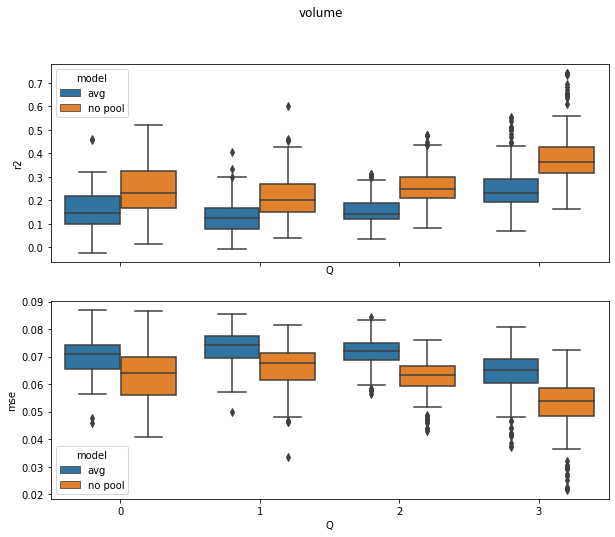

In [35]:
a = boxplot([sfcn_pyr_avg, sfcn_nopool], ['avg', 'no pool'])


,r2,mse,Q,model
0,0.525590,0.038980,3,avg
1,0.502817,0.041173,3,avg
2,0.531090,0.038938,3,avg
3,0.514738,0.040354,3,avg
4,0.219586,0.064509,3,avg
...,...,...,...,...
367,0.075146,0.076403,0,no pool
368,0.100013,0.075150,0,no pool
369,0.051601,0.079777,0,no pool
370,0.041022,0.076715,0,no pool


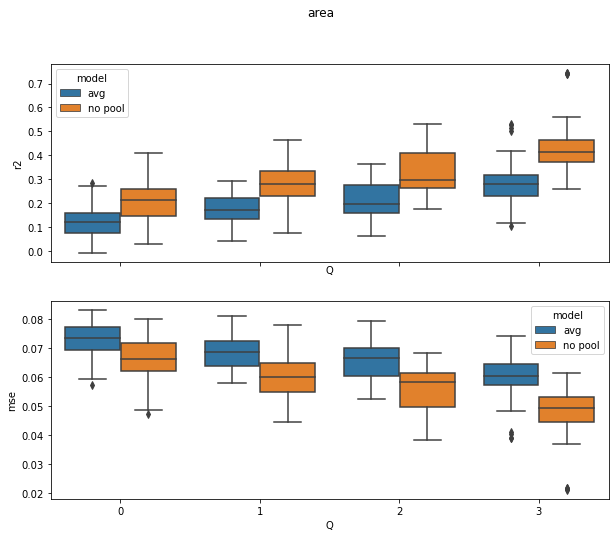

In [36]:
boxplot([sfcn_pyr_avg, sfcn_nopool], ['avg', 'no pool'], group='area')

,r2,mse,Q,model
0,0.165750,0.072433,2,avg
1,0.173083,0.072320,2,avg
2,0.167224,0.072164,2,avg
3,0.135269,0.075474,3,avg
4,0.047062,0.083924,2,avg
...,...,...,...,...
65,0.218002,0.066967,1,no pool
66,0.076874,0.075507,0,no pool
67,0.062418,0.079161,0,no pool
68,-0.005604,0.085939,0,no pool


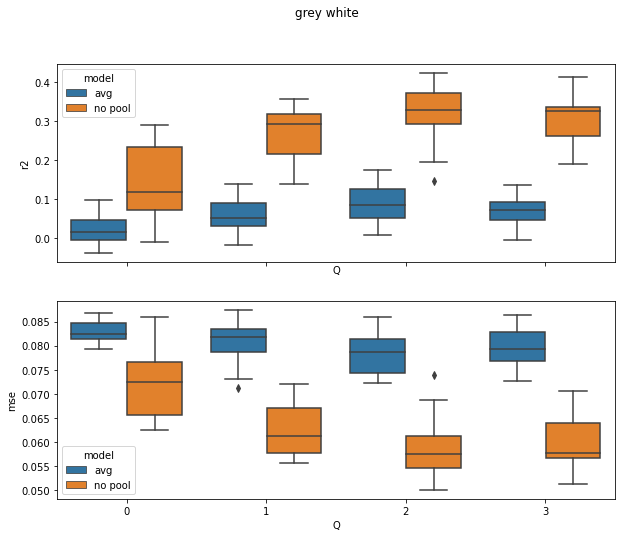

In [37]:
boxplot([sfcn_pyr_avg, sfcn_nopool], ['avg', 'no pool'], group='grey white')

,r2,mse,Q,model
0,0.053196,0.080801,1,avg
1,0.105625,0.076269,3,avg
2,0.113374,0.075479,3,avg
3,0.038991,0.083934,1,avg
4,0.093561,0.076467,3,avg
...,...,...,...,...
301,0.101326,0.075489,2,no pool
302,0.010218,0.083896,2,no pool
303,0.017690,0.078631,0,no pool
304,0.052761,0.078944,2,no pool


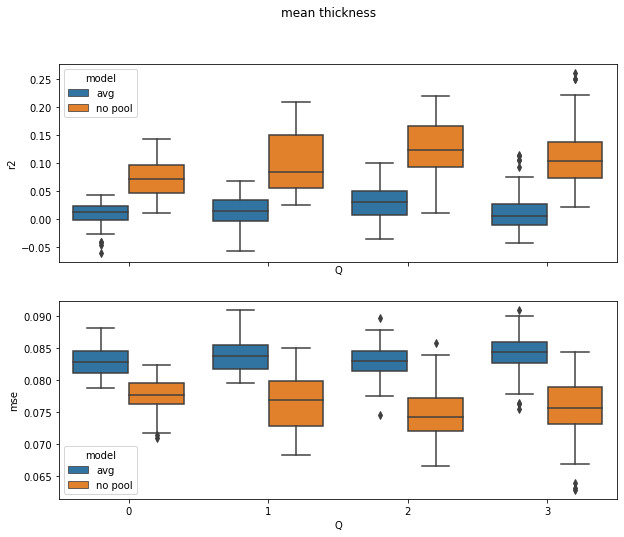

In [38]:
boxplot([sfcn_pyr_avg, sfcn_nopool], ['avg', 'no pool'], group='mean thickness')

,r2,mse,Q,model
0,0.389135,0.051619,0,avg
1,0.402180,0.051089,0,avg
2,0.378566,0.053036,0,avg
3,0.408435,0.051093,0,avg
4,0.388566,0.051170,0,avg
...,...,...,...,...
34,0.029592,0.082689,3,no pool
35,0.018994,0.083507,3,no pool
36,0.001058,0.081704,1,no pool
37,-0.007378,0.084069,0,no pool


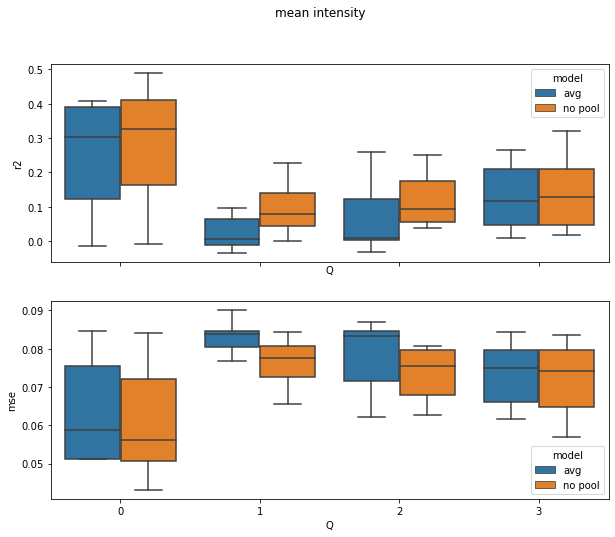

In [39]:
boxplot([sfcn_pyr_avg, sfcn_nopool], ['avg', 'no pool'], group='mean intensity')